# **Защита персональных данных клиентов**

Заказчиком поставлена задача защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Было поставлено условие, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

# Цель проекта

**Главной задачей** данного проекта стал поиск способа защиты данных клиентов страховой компании «Хоть потоп» путем преобразования данных без ухудшения качества модели.

# Предоставленные заказчиком данные

Для анализа заказчик предоставил 1 датасет с исходными данными, котрые содержат слебующие признаки:  
- Пол (gender) 
- Возраст (age) 
- Зарплата (salary) - зарплата застрахованного  
- Члены семьи (family) - количество членов его семьи  
И целeвой признак:
- Страховые выплаты (payments) - количество страховых выплат клиенту за последние 5 лет

## Исследование предоставленных данных

Для начала следует импотретировать необходимые для дальнейшей работы библиотеки.  

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

Далее я открою файл с данными для дальнейшего изучения.

In [3]:
way_1 = '/Users/anastasiaklubkova/Downloads/insurance.csv'
way_2 = '/datasets/insurance.csv'

In [4]:
if os.path.exists(way_1):
    data = pd.read_csv(way_1)
    print('Открыто локально')
elif os.path.exists(way_2):
    data = pd.read_csv(way_2)
    print('Открыто через ЯП')
else:
    print('Что-то пошло не так')

Открыто локально


In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Сперва стоит поменять названия колонок согласно правилам PEP8

In [4]:
data.columns = ['gender', 'age', 'salary', 'family', 'payments']
data.columns

Index(['gender', 'age', 'salary', 'family', 'payments'], dtype='object')

In [5]:
data.duplicated().sum()

153

Во время предобработки данных были обнаружены дибликаты, поэтому следует от них избавиться.

In [6]:
data = data.drop_duplicates()
data.shape

(4847, 5)

Также следует провести описательный анализ и визуализацию исходных данных.

In [12]:
data['age'].describe()

count    4847.000000
mean       31.023932
std         8.487995
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: age, dtype: float64

In [8]:
data['salary'].describe()

count     4847.000000
mean     39895.811842
std       9972.953985
min       5300.000000
25%      33200.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: salary, dtype: float64

<AxesSubplot:>

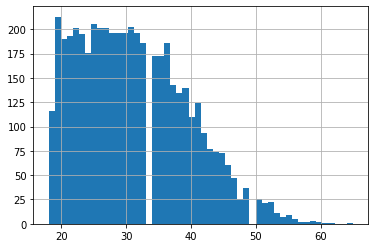

In [22]:
data['age'].hist(bins=50)

<AxesSubplot:>

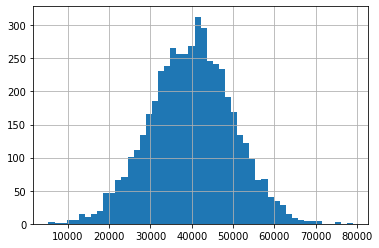

In [19]:
data['salary'].hist(bins=50)

0    0.501547
1    0.498453
Name: gender, dtype: float64


<AxesSubplot:ylabel='gender'>

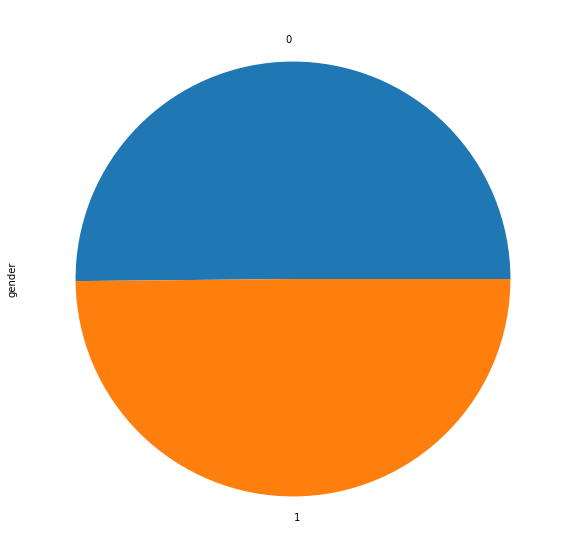

In [70]:
class_frequency = data['gender'].value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind='pie', figsize = (10, 10))

1    0.360635
0    0.301424
2    0.214153
3    0.090159
4    0.025583
5    0.006602
6    0.001444
Name: family, dtype: float64


<AxesSubplot:ylabel='family'>

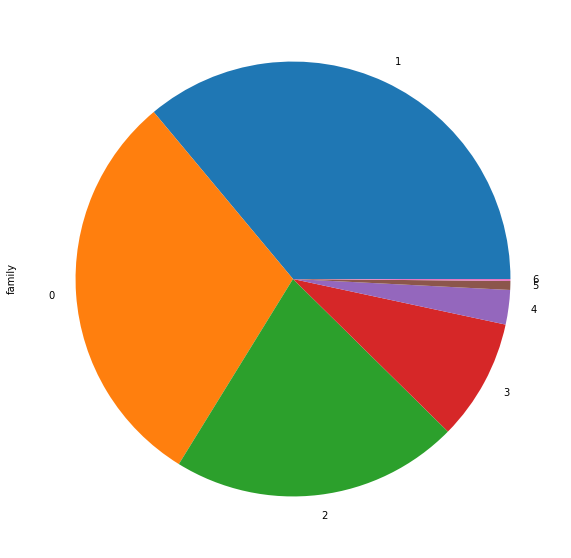

In [69]:
class_frequency = data['family'].value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind='pie', figsize = (10, 10))

0    0.883846
1    0.087270
2    0.023520
3    0.003714
4    0.001444
5    0.000206
Name: payments, dtype: float64


<AxesSubplot:ylabel='payments'>

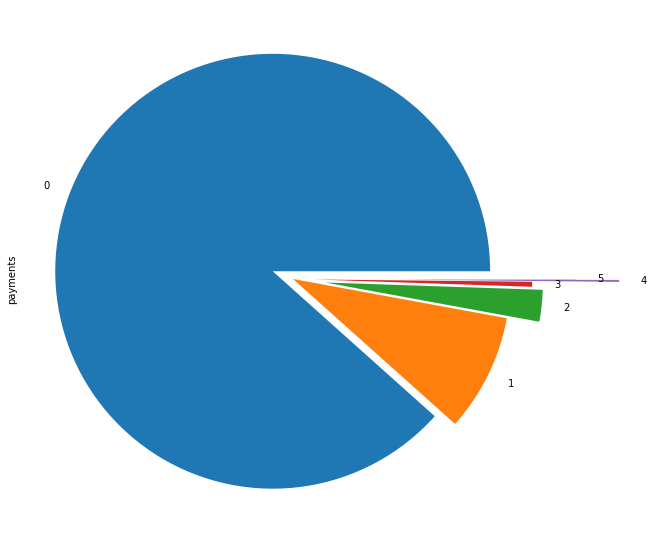

In [79]:
class_frequency = data['payments'].value_counts(normalize= True)
print(class_frequency)
explode = (0.1, 0, 0.15, 0.1, 0.5, 0.3)
class_frequency.plot(kind='pie', figsize = (10, 10), explode=explode)

**Выводы:**
На основе проведенного первичного анализа данных можно сделать вывод о следующем:  
- в данных отсутсвуют пропуски  
- присутствовали дубликаты (устранено)
- распределение возраста клиентов смещен слево к более младшему (до 30ти)  
- распределение зарабатной платы клиентов распределено нормально
- отсутствует дисбаланс по полу клиентов
- чаще всего у клиентов до 4 членов семьи
- в исходных данных приобладает категория клиентов без истории страховых выплат

## Умножение матриц

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)  

- $n$ - количество строк в матрице признаков  

- $m$ - количество столбцов в матрице признаков   

- $T$ - обозначение транспонирования матрицы

- $P$ - обратимая матрица

**Предсказания:**

$$
a = Xw
$$

**Задача обучения:**

$$
w = \arg\min_w MSE(Xw, y)
$$

**Формула обучения:**

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** показатель метрики качества модели линейной регрессии не изменится, поскольку параметры исходной модели и преобразованной не изменятся путем умножения признаков на обратимую матрицу.

**Обоснование:** Следует рассмотреть доказательство данного ответа путем пошагового преобразования формул обучения исходной модели и преобразованной.

**Шаг 1.**  
Согласно первому условию, "Признаки умножают...". Из этого следует, что умножение матрицы признаков X, которая имеет размерность n строк на m столбцов, и обратимой матрицы P, которая имеет размерность m строк на k столбцов, имеет следующий вид поскольку только при равенстве количества ширины первой матрицы и высоты второй возможно матричное умножение: 

$$ (n*m)@(m*k)$$

Согласно второму условию, "... на обратимую матрицу". Из этого следует, что данная матрица является квадратной. Поскольку известно, что ширина матрицы P равна m, как и высота матрицы X, а также, что матрица P является квадратичной, то логично утверждение, что произведение матриц X и P имеет следующий вид:

$$(n*m)@(m*m)$$

Далее в доказательстве в качестве изображения умножения матриц X и P будет использоваться данное произведение высот и широт матриц.

**Шаг 2.** 
В данном шаге я докажу, что умножение признаков на обратимую матрицу не повлияет на результат обучения модели линейной регрессии путем математического доказательства о равенстве формул с умножением признака и без него.

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (XP)^{-1} ((XP)^T)^{-1} (XP)^T  y
$$
$$
w' = (XP)^{-1} E  y
$$
$$
w' = (XP)^{-1}  y
$$

Таким образом, ни параметры модели, ни размерность модели не влияют на конечный вид формулы обучения, а значит параметры модели линейной регрессии в исходной модели и в преобразованной моделях соотносимы и не повлияют на метрику качества модели. 

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
.....
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$

## Алгоритм преобразования

**Алгоритм:**
1. Определить размер квадратной обратимой матрицы
2. Сгенерировать рандомную обратимую матрицу с нормальным распределением
3. Далее следует убедиться, что она в действительности обратима
4. Совершить матричное умножение признаков на обратимую матрицу
5. Обучить модель на исходных признаках и на преобразованных
6. Сравнить прогнозы двух моделей
7. Сравнить метрики качества

**Обоснование:**
1. Как было определено ранее, ширина матрицы X равна по условию умножения высоте матрицы P, а следовательно стороны матрицы P равны ширине матрицы X
2. Генерация нормально распределенной обратимой матрицы методом np.random.normal для повышения вероятности обратимости матрицы, ка было доказано ранее, это не повляиет на метрику качества
3. Проверка обратимости методом np.linalg.det
4. Как было доказано ранее, данное действие не повляиет на качество модели (реализуется посредством умножения X на P знаком @)

## Проверка алгоритма

Проверка алгоритма на исходных признаках.

In [84]:
features = data.drop('payments', axis=1)
target = data['payments']

In [85]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010044852068


Проверка алгоритма на преобразованных признаках.

Сперва следует создать новую матрицу по числу признаков - 4 на 4

In [90]:
np.random.seed(42)
P = np.random.normal(size=(4, 4))
print(P)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]


In [99]:
new_features = features@P

In [102]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(new_features, target)
predictions = model.predict(new_features)
print(r2_score(target, predictions))

0.4302010044852028
